In [1]:
import numpy as np
import pylab
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import MyMultiSimTools as mst



In [3]:
NuisCov=np.loadtxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/Covariance.txt")

In [17]:
modes=np.arange(0,4)

AmpSigmas=np.loadtxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/widths/Amp_widths.txt",dtype=str)
PhsSigmas=np.loadtxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/widths/Phs_widths.txt",dtype=str)
AmpWidths=[]
AmpCenters=[]
PhsWidths=[]
PhsCenters=[]
for mode in modes:
    #print(mode)
    for i in range(0,len(AmpSigmas)):   
        if AmpSigmas[i,1].astype(float)==mode:
            AmpWidths.append(AmpSigmas[i,4].astype(float)-AmpSigmas[i,2].astype(float))
            AmpCenters.append(AmpSigmas[i,2].astype(float))   
    for i in range(0,len(PhsSigmas)):   
        if PhsSigmas[i,1].astype(float)==mode+1:
            PhsWidths.append((PhsSigmas[i,4].astype(float)-PhsSigmas[i,2].astype(float)))
            PhsCenters.append(PhsSigmas[i,2].astype(float))
#print(PhsWidth)  
amp_modes=np.arange(0,4)
phs_modes=np.arange(1,5)
AmpCenters2=AmpCenters.copy
print(AmpCenters)
for i in PhsCenters:
    AmpCenters2.append(i)
print(AmpCenters2)    
cen=np.zeros(8)
for i in range(0,len(AmpCenters2)):
    cen[i]=AmpCenters[i]
print(cen)    

[0.0118168645938611, 0.03315746211732763, 0.03781079293258483, -0.2240572104235004]


AttributeError: 'builtin_function_or_method' object has no attribute 'append'

In [21]:
modes=np.arange(0,4)

AmpSigmas=np.loadtxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/widths/Amp_widths.txt",dtype=str)
PhsSigmas=np.loadtxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/widths/Phs_widths.txt",dtype=str)
AmpWidths=[]
AmpCenters=[]
PhsWidths=[]
PhsCenters=[]
for mode in modes:
    #print(mode)
    for i in range(0,len(AmpSigmas)):   
        if AmpSigmas[i,1].astype(float)==mode:
            AmpWidths.append(AmpSigmas[i,4].astype(float)-AmpSigmas[i,2].astype(float))
            AmpCenters.append(AmpSigmas[i,2].astype(float))   
    for i in range(0,len(PhsSigmas)):   
        if PhsSigmas[i,1].astype(float)==mode+1:
            PhsWidths.append((PhsSigmas[i,4].astype(float)-PhsSigmas[i,2].astype(float)))
            PhsCenters.append(PhsSigmas[i,2].astype(float))
#print(PhsWidth)  
amp_modes=np.arange(0,4)
phs_modes=np.arange(1,5)
mean=np.concatenate(AmpCenters,PhsCentersCenters)

Cen=

icepath = "/home/anegi/multisim/ppc/ice/spice_ftp-v2/icemodel_.dat"   #central icemodel
central = mst.LoadIcedata(icepath)
NuisCov=np.loadtxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/Covariance_2.txt")
#depth=1948-central[0]

ModelsToRun=5000
AllModels=[]
for i in range(0,ModelsToRun):
    Realization=np.random.multivariate_normal(np.zeros(8),NuisCov)
    amp_shifts=Realization[0:4]*AmpWidths
    phs_shifts=Realization[4:8]*PhsWidths
    
    pert_model = mst.GetIcemodel( central, 
                                    amp_modes_to_shift  = amp_modes, 
                                    amp_shifts          = amp_shifts,
                                    phs_modes_to_shift  = phs_modes,
                                    phs_shifts          = phs_shifts)
    AllModels.append(pert_model[1]) #absorption length
    if (i%100==0):
        print(i)
AllModes=np.array(AllModels)

/tmp/ipykernel_31271/765150816.py:29: RuntimeWarning: covariance is not positive-semidefinite.
  Realization=np.random.multivariate_normal(np.zeros(8),NuisCov)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


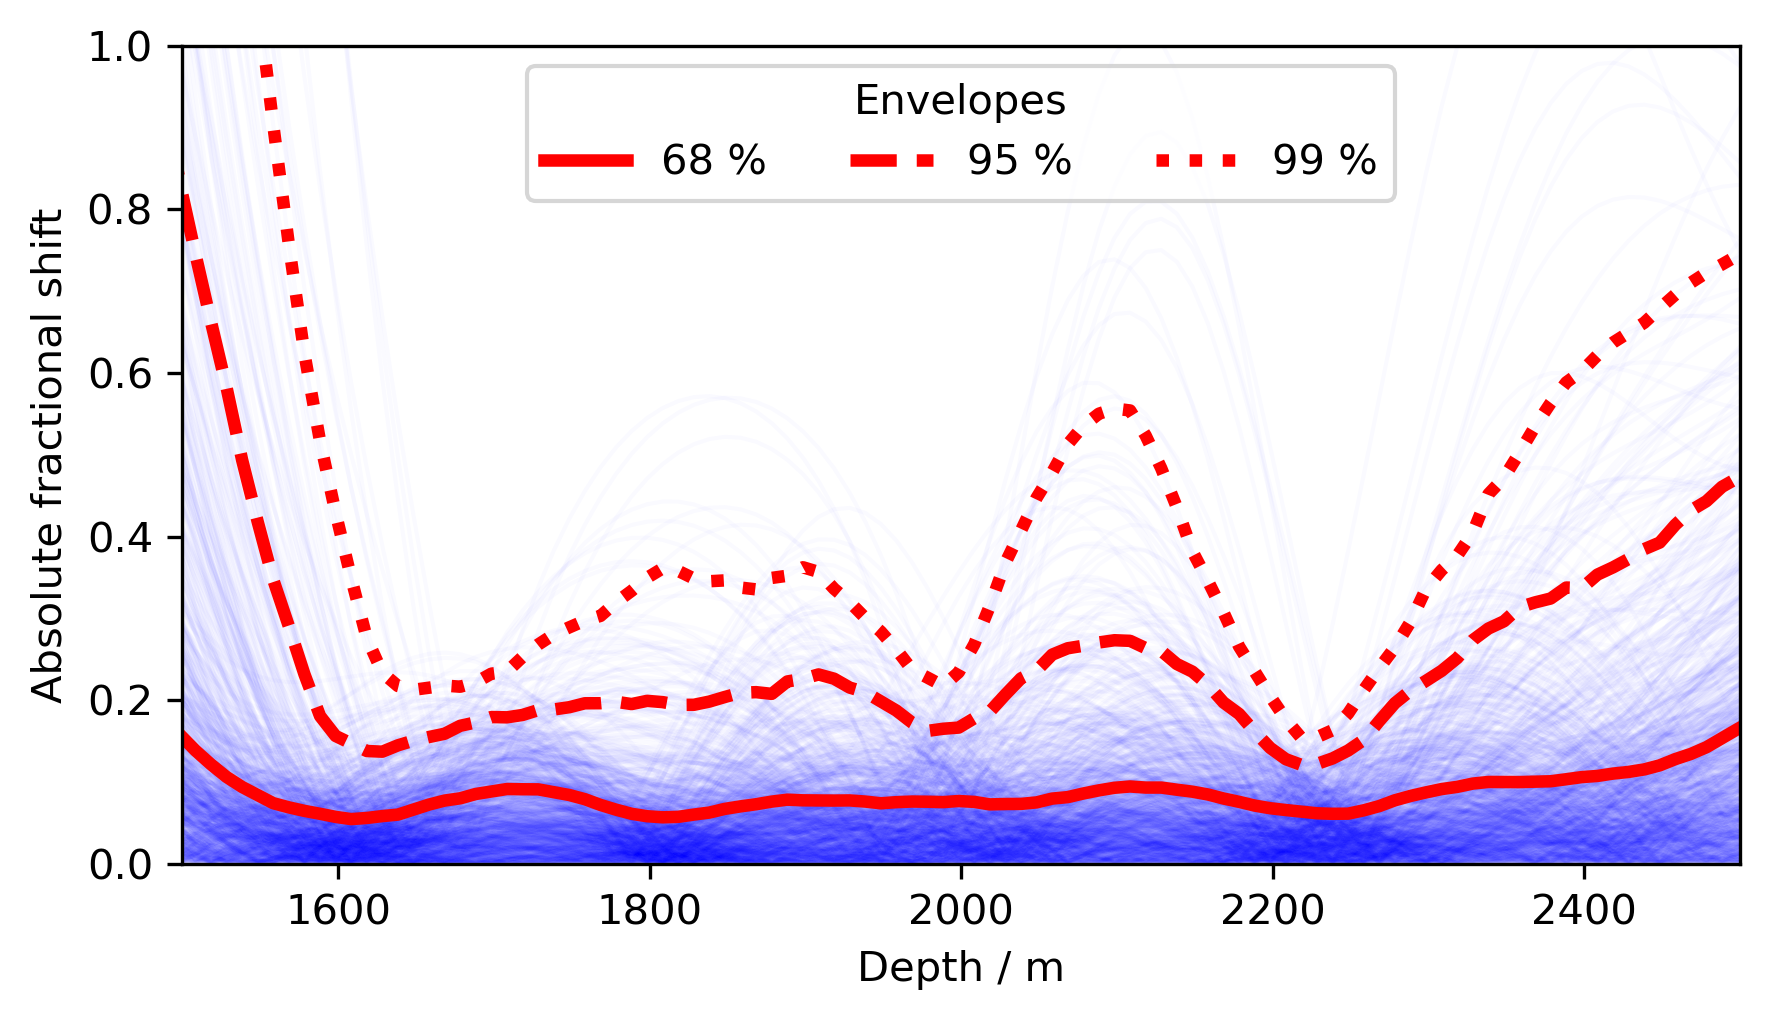

In [26]:
freq68=[]
freq95=[]
freq99=[]
AbsFracShift=[]
TopLine=1000
depth=central[0]
pylab.figure(figsize=(6,3.5),dpi=300)
for i in range(0,TopLine):
    AbsFracShift.append(np.abs(AllModels[i]/central[1]-1))
    
for fs in np.transpose(AbsFracShift):
    freq68.append(sorted(fs)[int(len(fs)*0.68)])
    freq95.append(sorted(fs)[int(len(fs)*0.95)])
    freq99.append(sorted(fs)[int(len(fs)*0.99)])
SDs=[]
for i in np.transpose(AllModes):
    SDs.append(np.std(i))
    

for i in range(0, TopLine):
    pylab.plot(depth,AbsFracShift[i],alpha=0.02,color='blue',linewidth=1)
pylab.plot(depth,freq68,'-',color='red',linewidth=3,label='68 %')
pylab.plot(depth,freq95,'--',color='red',linewidth=3,label='95 %')
pylab.plot(depth,freq99,':',color='red',linewidth=3,label='99 %')

    #pylab.errorbar(central[0],Means/central[1], yerr=SDs/central[1],fmt='o')
pylab.ylim(0,1)
pylab.xlim(1500,2500)
pylab.ylim()
pylab.ylabel("Absolute fractional shift")
pylab.xlabel("Depth / m"),
#pylab.title("Including mode correlations")
pylab.legend(loc='upper center',ncol=3,title='Envelopes')
pylab.tight_layout()
#pylab.savefig("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Envelope/AbsFracShift.png",dpi=300,bbox_inches='tight')

In [21]:
modes=np.arange(0,5)

AmpSigmas=np.loadtxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/widths/Amp_widths.txt",dtype=str)
PhsSigmas=np.loadtxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/widths/Phs_widths.txt",dtype=str)
AmpWidths=[]
AmpCenters=[]
PhsWidths=[]
PhsCenters=[]
for mode in modes:
    #print(mode)
    for i in range(0,len(AmpSigmas)):   
        if AmpSigmas[i,1].astype(float)==mode:
            AmpWidths.append(AmpSigmas[i,4].astype(float)-AmpSigmas[i,2].astype(float))
            AmpCenters.append(AmpSigmas[i,2].astype(float))   
    for i in range(0,len(PhsSigmas)):   
        if PhsSigmas[i,1].astype(float)==mode:
            PhsWidths.append((PhsSigmas[i,4].astype(float)-PhsSigmas[i,2].astype(float)))
            PhsCenters.append(PhsSigmas[i,2].astype(float))
#print(len(PhsWidths))  
amp_modes=np.arange(0,5)
phs_modes=np.arange(1,5)

icepath = "/home/anegi/multisim/ppc/ice/spice_ftp-v2/icemodel_.dat"
central = mst.LoadIcedata(icepath)
NuisCov=np.loadtxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/Covariance_2.txt")
#depth=1948-central[0]

ModelsToRun=10000
AllModels=[]
for i in range(0,ModelsToRun):
    Realization=np.random.multivariate_normal(np.zeros(9),NuisCov)
    amp_shifts=Realization[0:5]*AmpWidths
    phs_shifts=Realization[5:9]*PhsWidths
    
    pert_model = mst.GetIcemodel( central, 
                                    amp_modes_to_shift  = amp_modes, 
                                    amp_shifts          = amp_shifts,
                                    phs_modes_to_shift  = phs_modes,
                                    phs_shifts          = phs_shifts)
    AllModels.append(pert_model[1]) #absorption length
    if (i%500==0):
        print(i)
AllModes=np.array(AllModels)
print("done")

/tmp/ipykernel_9334/820847693.py:31: RuntimeWarning: covariance is not positive-semidefinite.
  Realization=np.random.multivariate_normal(np.zeros(9),NuisCov)


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


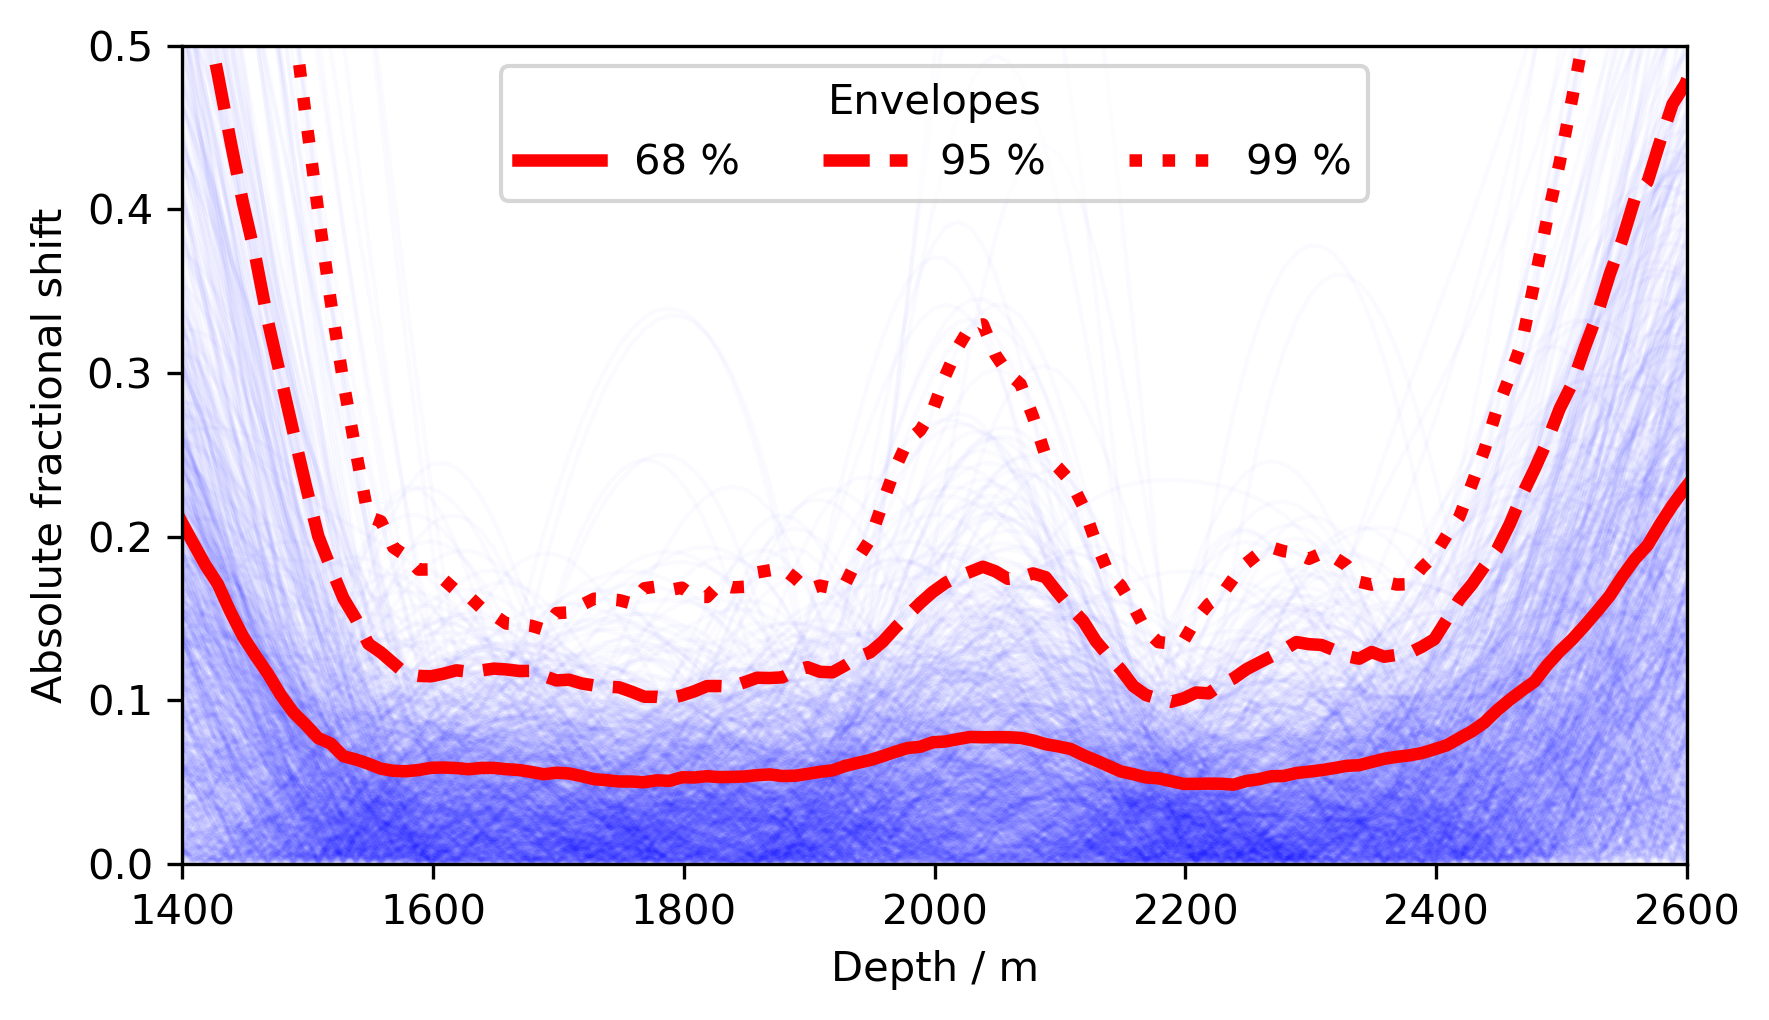

In [22]:
freq68=[]
freq95=[]
freq99=[]
AbsFracShift=[]
TopLine=1000
depth=central[0]
pylab.figure(figsize=(6,3.5),dpi=300)
for i in range(0,TopLine):
    AbsFracShift.append(np.abs(AllModels[i]/central[1]-1))
    
for fs in np.transpose(AbsFracShift):
    freq68.append(sorted(fs)[int(len(fs)*0.68)])
    freq95.append(sorted(fs)[int(len(fs)*0.95)])
    freq99.append(sorted(fs)[int(len(fs)*0.99)])
SDs=[]
for i in np.transpose(AllModes):
    SDs.append(np.std(i))
    

for i in range(0, TopLine):
    pylab.plot(depth,AbsFracShift[i],alpha=0.02,color='blue',linewidth=1)
pylab.plot(depth,freq68,'-',color='red',linewidth=3,label='68 %')
pylab.plot(depth,freq95,'--',color='red',linewidth=3,label='95 %')
pylab.plot(depth,freq99,':',color='red',linewidth=3,label='99 %')

    #pylab.errorbar(central[0],Means/central[1], yerr=SDs/central[1],fmt='o')
pylab.ylim(0,0.5)
pylab.xlim(1400,2600)
pylab.ylim()
pylab.ylabel("Absolute fractional shift")
pylab.xlabel("Depth / m"),
#pylab.title("Including mode correlations")
pylab.legend(loc='upper center',ncol=3,title='Envelopes')
pylab.tight_layout()
#pylab.savefig("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Envelope/AbsFracShift.png",dpi=300,bbox_inches='tight')

In [24]:
modes=np.arange(0,5)

AmpSigmas=np.loadtxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/widths/Amp_widths.txt",dtype=str)
PhsSigmas=np.loadtxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/widths/Phs_widths.txt",dtype=str)
AmpWidths=[]
AmpCenters=[]
PhsWidths=[]
PhsCenters=[]
for mode in modes:
    #print(mode)
    for i in range(0,len(AmpSigmas)):   
        if AmpSigmas[i,1].astype(float)==mode:
            AmpWidths.append(AmpSigmas[i,4].astype(float)-AmpSigmas[i,2].astype(float))
            AmpCenters.append(AmpSigmas[i,2].astype(float))   
    for i in range(0,len(PhsSigmas)):   
        if PhsSigmas[i,1].astype(float)==mode:
            PhsWidths.append((PhsSigmas[i,4].astype(float)-PhsSigmas[i,2].astype(float)))
            PhsCenters.append(PhsSigmas[i,2].astype(float))
#print(len(PhsWidths))  
amp_modes=np.arange(0,5)
phs_modes=np.arange(1,5)
for i in PhsCenters:
    AmpCenters.append(i)
icepath = "/home/anegi/multisim/ppc/ice/spice_ftp-v2/icemodel_.dat"
central = mst.LoadIcedata(icepath)
NuisCov=np.loadtxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/Covariance_2.txt")
#depth=1948-central[0]

ModelsToRun=10000
AllModels=[]
for i in range(0,ModelsToRun):
    Realization=np.random.multivariate_normal(AmpCenters,NuisCov)
    amp_shifts=Realization[0:5]*AmpWidths
    phs_shifts=Realization[5:9]*PhsWidths
    
    pert_model = mst.GetIcemodel( central, 
                                    amp_modes_to_shift  = amp_modes, 
                                    amp_shifts          = amp_shifts,
                                    phs_modes_to_shift  = phs_modes,
                                    phs_shifts          = phs_shifts)
    AllModels.append(pert_model[1]) #absorption length
    if (i%500==0):
        print(i)
AllModes=np.array(AllModels)
print("done")

/tmp/ipykernel_9334/3542705186.py:32: RuntimeWarning: covariance is not positive-semidefinite.
  Realization=np.random.multivariate_normal(AmpCenters,NuisCov)


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
done


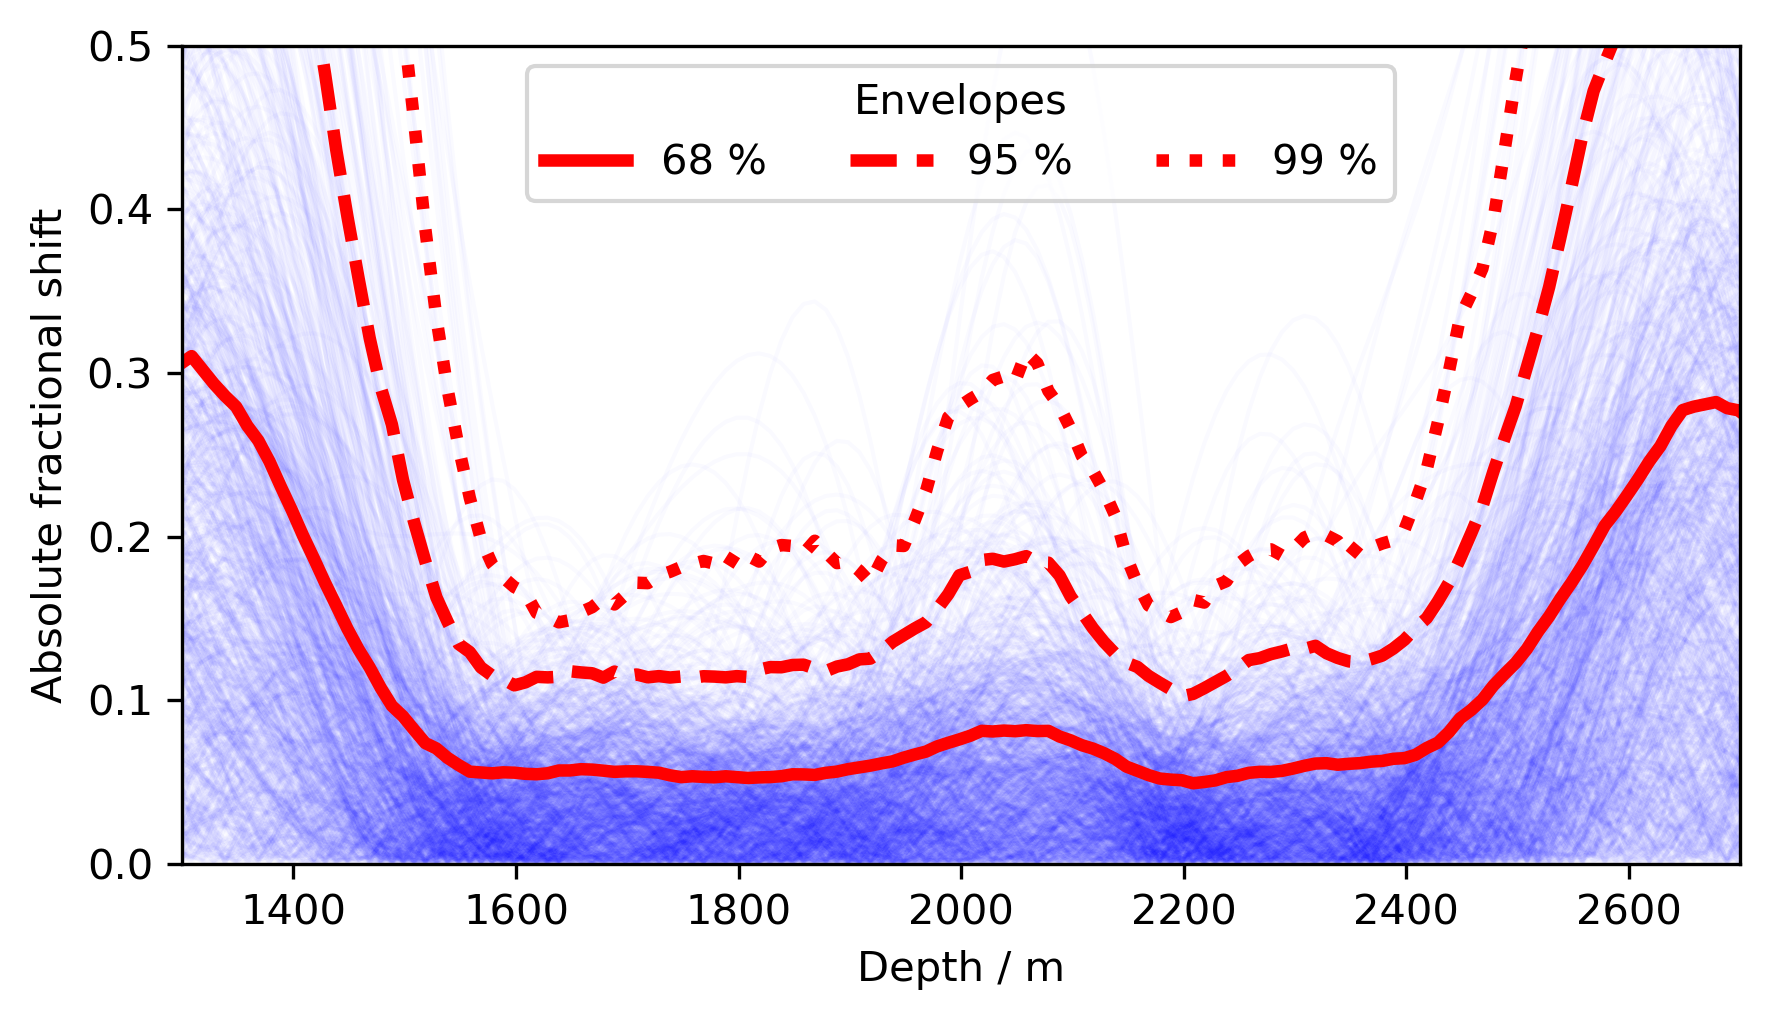

In [25]:
freq68=[]
freq95=[]
freq99=[]
AbsFracShift=[]
TopLine=1000
depth=central[0]
pylab.figure(figsize=(6,3.5),dpi=300)
for i in range(0,TopLine):
    AbsFracShift.append(np.abs(AllModels[i]/central[1]-1))
    
for fs in np.transpose(AbsFracShift):
    freq68.append(sorted(fs)[int(len(fs)*0.68)])
    freq95.append(sorted(fs)[int(len(fs)*0.95)])
    freq99.append(sorted(fs)[int(len(fs)*0.99)])
SDs=[]
for i in np.transpose(AllModes):
    SDs.append(np.std(i))
    

for i in range(0, TopLine):
    pylab.plot(depth,AbsFracShift[i],alpha=0.02,color='blue',linewidth=1)
pylab.plot(depth,freq68,'-',color='red',linewidth=3,label='68 %')
pylab.plot(depth,freq95,'--',color='red',linewidth=3,label='95 %')
pylab.plot(depth,freq99,':',color='red',linewidth=3,label='99 %')

    #pylab.errorbar(central[0],Means/central[1], yerr=SDs/central[1],fmt='o')
pylab.ylim(0,0.5)
pylab.xlim(1300,2700)
pylab.ylim()
pylab.ylabel("Absolute fractional shift")
pylab.xlabel("Depth / m"),
#pylab.title("Including mode correlations")
pylab.legend(loc='upper center',ncol=3,title='Envelopes')
pylab.tight_layout()
#pylab.savefig("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Envelope/AbsFracShift.png",dpi=300,bbox_inches='tight')

In [5]:
modes=np.arange(0,5)

AmpSigmas=np.loadtxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/widths/Amp_widths.txt",dtype=str)
PhsSigmas=np.loadtxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/widths/Phs_widths.txt",dtype=str)
AmpWidths=[]
AmpCenters=[]
PhsWidths=[]
PhsCenters=[]
for mode in modes:
    #print(mode)
    for i in range(0,len(AmpSigmas)):   
        if AmpSigmas[i,1].astype(float)==mode:
            AmpWidths.append(AmpSigmas[i,4].astype(float)-AmpSigmas[i,2].astype(float))
            AmpCenters.append(AmpSigmas[i,2].astype(float))   
    for i in range(0,len(PhsSigmas)):   
        if PhsSigmas[i,1].astype(float)==mode+1:
            PhsWidths.append((PhsSigmas[i,4].astype(float)-PhsSigmas[i,2].astype(float)))
            PhsCenters.append(PhsSigmas[i,2].astype(float))
#print(len(PhsWidths))  
amp_modes=np.arange(0,5)
phs_modes=np.arange(1,6)
#print(len(AmpCenters))
for i in PhsCenters:
    AmpCenters.append(i)
    
#print(len(AmpCenters))    
icepath = "/home/anegi/multisim/ppc/ice/spice_ftp-v2/icemodel_.dat"
central = mst.LoadIcedata(icepath)
NuisCov=np.loadtxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/Covariance_3.txt")
#depth=1948-central[0]

ModelsToRun=10000
AllModels=[]
for i in range(0,ModelsToRun):
    Realization=np.random.multivariate_normal(AmpCenters,NuisCov)
    amp_shifts=Realization[0:5]*AmpWidths
    phs_shifts=Realization[5:10]*PhsWidths
    
    pert_model = mst.GetIcemodel( central, 
                                    amp_modes_to_shift  = amp_modes, 
                                    amp_shifts          = amp_shifts,
                                    phs_modes_to_shift  = phs_modes,
                                    phs_shifts          = phs_shifts)
    AllModels.append(pert_model[1]) #absorption length
    if (i%500==0):
        print(i)
AllModes=np.array(AllModels)
print("done")

5
10
0


/tmp/ipykernel_957/343290309.py:35: RuntimeWarning: covariance is not positive-semidefinite.
  Realization=np.random.multivariate_normal(AmpCenters,NuisCov)


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
done


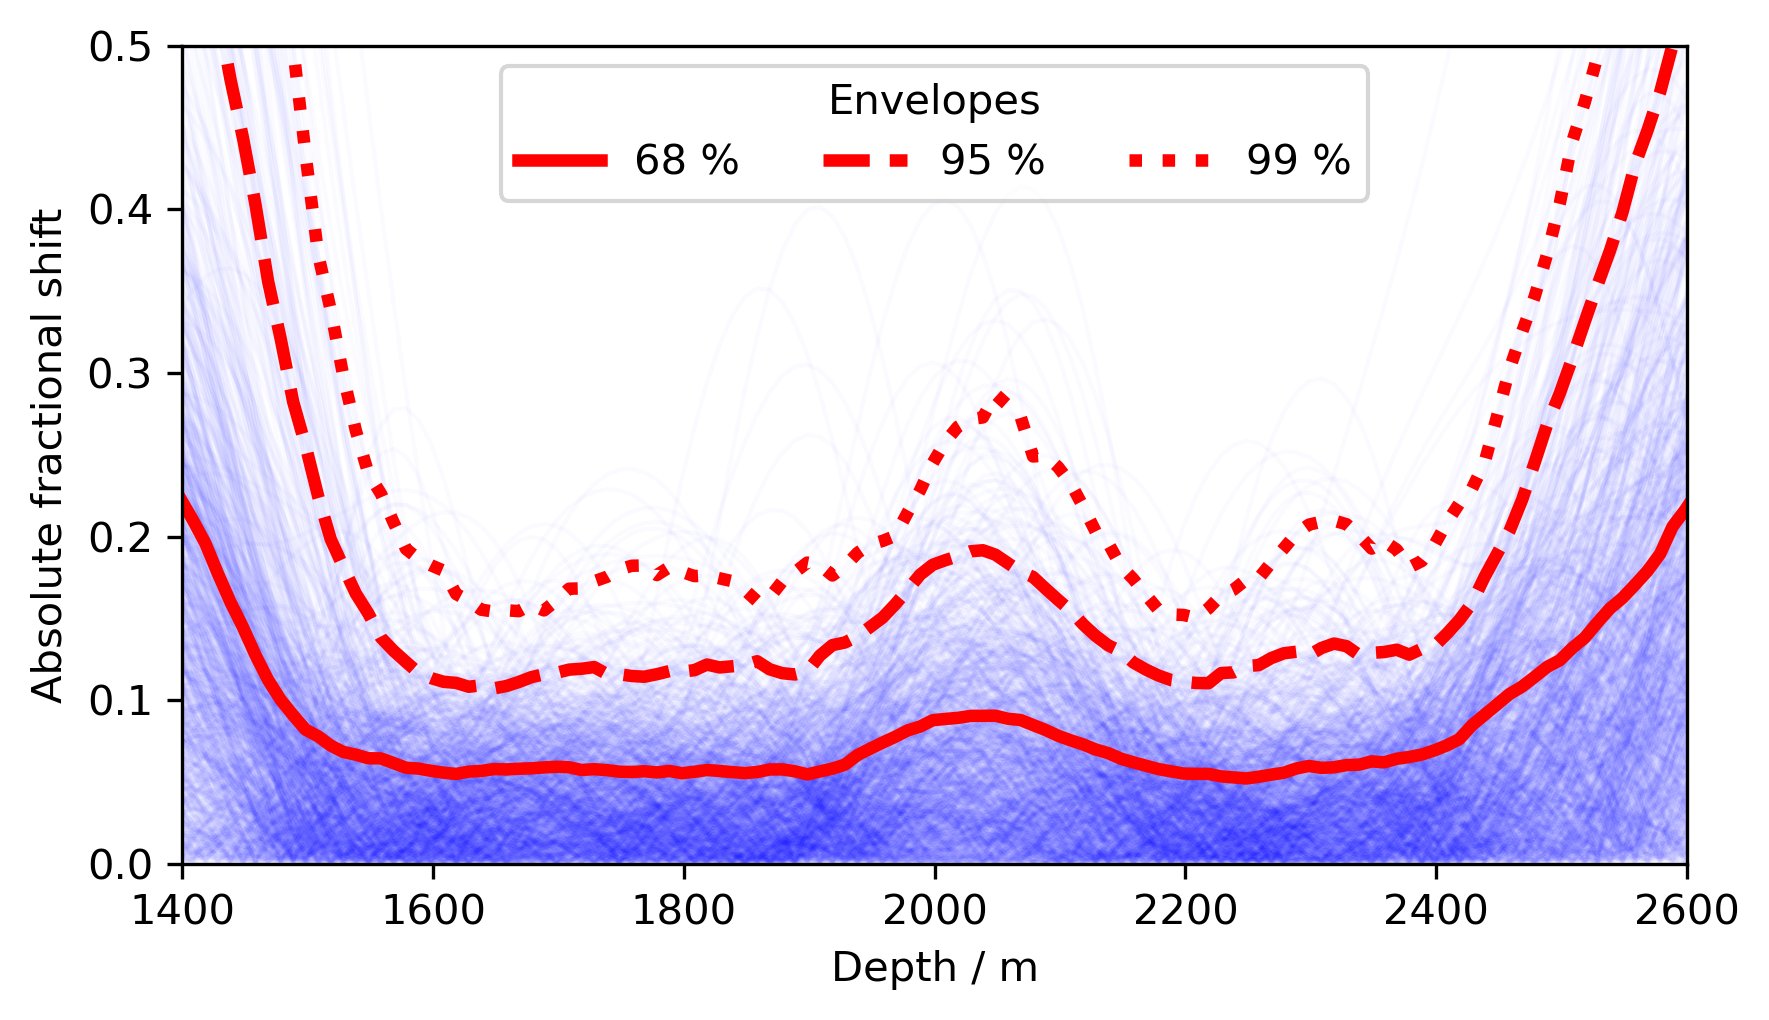

In [8]:
freq68=[]
freq95=[]
freq99=[]
AbsFracShift=[]
TopLine=1000
depth=central[0]
pylab.figure(figsize=(6,3.5),dpi=300)
for i in range(0,TopLine):
    AbsFracShift.append(np.abs(AllModels[i]/central[1]-1))
    
for fs in np.transpose(AbsFracShift):
    freq68.append(sorted(fs)[int(len(fs)*0.68)])
    freq95.append(sorted(fs)[int(len(fs)*0.95)])
    freq99.append(sorted(fs)[int(len(fs)*0.99)])
SDs=[]
for i in np.transpose(AllModes):
    SDs.append(np.std(i))
    

for i in range(0, TopLine):
    pylab.plot(depth,AbsFracShift[i],alpha=0.02,color='blue',linewidth=1)
pylab.plot(depth,freq68,'-',color='red',linewidth=3,label='68 %')
pylab.plot(depth,freq95,'--',color='red',linewidth=3,label='95 %')
pylab.plot(depth,freq99,':',color='red',linewidth=3,label='99 %')

    #pylab.errorbar(central[0],Means/central[1], yerr=SDs/central[1],fmt='o')
pylab.ylim(0,0.5)
pylab.xlim(1400,2600)
pylab.ylim()
pylab.ylabel("Absolute fractional shift")
pylab.xlabel("Depth / m"),
#pylab.title("Including mode correlations")
pylab.legend(loc='upper center',ncol=3,title='Envelopes')
pylab.tight_layout()
pylab.savefig("/data/user/anegi/ppc/LLHs/spice_ftp-v2/Plots/AbsFracShift.png",dpi=300,bbox_inches='tight')